매크로를 이용해 동적 사이트 가져오기 \
셀레니움 이용!

In [2]:
!pip install selenium

In [11]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.Keys import Keys

driver = webdriver.Chrome() #두번 작동 시키면 크롬이 두개 열림. 한번만 하기

In [15]:
import time

driver.get('https://www.naver.com')
time.sleep(5)

search = driver.find_element(By.CSS_SELECTOR, "input.search_input")
search.send_keys("동대구")
time.sleep(1)
search.send_keys(Keys.RETURN)

### 정보 제공 제한 뚫기

In [18]:
!pip install undetected-chromedriver

     ---------------------------------------- 0.0/65.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/65.4 kB ? eta -:--:--
     ---------------------------------------- 65.4/65.4 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/159.1 kB ? eta -:--:--
   ---------------------------------------- 159.1/159.1 kB 4.8 MB/s eta 0:00:00
  Created wheel for undetected-chromedriver: filename=undetected_chromedriver-3.5.5-py3-none-any.whl size=47130 sha256=834fb3a46c2f26eeaf82c732d2908336c146854a85ca50268dbef8fb93b44cab
  Stored in directory: c:\users\dia\appdata\local\pip\cache\wheels\c4\f1\aa\9de6cf276210554d91e9c0526864563e850a428c5e76da4914
Successfully built undetected-chromedriver


In [20]:
import undetected_chromedriver as uc

driver = uc.Chrome()

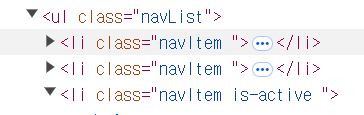

In [27]:
driver.find_elements(By.CSS_SELECTOR, "li.navItem") #위 사진과 같이 사이트에 3개 있어서 3개를 찾은것

[<undetected_chromedriver.webelement.WebElement (session="de33c5ae126cae469848266af66ef527", element="f.4A9F66944F0442EFD40931E99A73AD91.d.0D8AE4A9EB8397ABA7021DE6295837DF.e.776")>,
 <undetected_chromedriver.webelement.WebElement (session="de33c5ae126cae469848266af66ef527", element="f.4A9F66944F0442EFD40931E99A73AD91.d.0D8AE4A9EB8397ABA7021DE6295837DF.e.779")>,
 <undetected_chromedriver.webelement.WebElement (session="de33c5ae126cae469848266af66ef527", element="f.4A9F66944F0442EFD40931E99A73AD91.d.0D8AE4A9EB8397ABA7021DE6295837DF.e.782")>]

In [33]:
for i in driver.find_elements(By.CSS_SELECTOR, "li.navItem"):
    print(i.text) #알맹이 바로 보기

이용정보
판매정보
기대평246


In [37]:
for i in driver.find_elements(By.CSS_SELECTOR, "li.navItem"):
    if "기대평" in i.text:
        i.click()

### 기대평 1쪽부터 10쪽까지

In [42]:
for i in driver.find_elements(By.CSS_SELECTOR, "a.pageNumBtn"):
    print(i.text) 

1
2
3
4
5
6
7
8
9
10


In [50]:
#답
#1~10
for i in driver.find_element(By.CSS_SELECTOR, "ol.pageNumWrap").find_elements(By.CSS_SELECTOR, "a.pageNumBtn"):
    print(i.text)
    time.sleep(1)

1
2
3
4
5
6
7
8
9
10


In [111]:
#답
#1~끝페이지
while True:
    for i in driver.find_element(By.CSS_SELECTOR, "ol.pageNumWrap").find_elements(By.CSS_SELECTOR, "li"):
        i.click()
        time.sleep(1)
        
    try:
        driver.find_element(By.CSS_SELECTOR, "a.pageNextBtn.pageArrow").click()
        time.sleep(1)
    except:
        break
##공백은 .으로 채우기
##다음 페이지로 가는 버튼 눌리는 거

### 리뷰 크롤링

In [103]:
titles = []
dates = []
contents = []

for i in driver.find_elements(By.CSS_SELECTOR, "li.bbsItem"):
    title = i.find_element(By.CSS_SELECTOR, "strong.bbsTitleText").text
    titles.append(title) 
    content = i.find_element(By.CSS_SELECTOR, "p.bbsText").text
    contents.append(content) 
    date = i.find_elements(By.CSS_SELECTOR, "li.bbsItemInfoList")[1].text
    dates.append(date) 

In [105]:
data = {
    '제목': titles,
    '날짜': dates,
    '내용': contents
}

df = pd.DataFrame(data)

In [107]:
df

,제목,날짜,내용
0,완전 설레임 두근두근~(♡^--^♡),2024.09.17,시간이가 왜 안가지??\n빨리 가고 싶어요 헤헿(♡^--^♡)
1,보고싶다~,2024.09.14,지민이 오늘도 넘보고싶네~\n기대만땅 전시회!!!
2,지민아 사랑해,2024.09.13,전시회 가보자구
3,짐토버,2024.09.13,두근두근 넘 기대된다
4,지민 전시회 좋아요,2024.09.12,우리 지민이 보고싶다ㅠㅠㅠㅠ 전시회로 나마 만날 수 있어 행복합니다
5,나무 너무 기대됨,2024.09.12,지민이 전시회 빨리 보고싶다\n날씨도 딱좋고 기대중
6,지민이없는지민이생일전시관람,2024.09.12,지민이생일에 전시회에서라도 지민이 볼 수 있어서 행복합니다 :)
7,기대된다~,2024.09.11,생일 주말은 벌써 매진..\n아쉽지만 다른 날로 예매완료.\n지민이 보러 빨리 가고...
8,JIMIN??,2024.09.11,짐토버에 못가서ㅠ 표를 구할수가 없어서ㅠ 아쉽지만\n19일이 넘 기대가 된다^^
9,Jimin??????,2024.09.11,I love you Jimin\nI look forward to seeing you...


### 강사님 코드

In [115]:
total = []

while True:

    for i in driver.find_element(By.CSS_SELECTOR, "ol.pageNumWrap").find_elements(By.CSS_SELECTOR, "li"):
        i.click()
        time.sleep(1)

        for r in driver.find_elements(By.CSS_SELECTOR, "li.bbsItem"):
            title = (r.find_element(By.CSS_SELECTOR, "strong.bbsTitleText").text)
            content = (r.find_element(By.CSS_SELECTOR, "p.bbsText").text.strip())
            date = (r.find_elements(By.CSS_SELECTOR, "li.bbsItemInfoList")[1].text.strip())
            total.append([title, date, content])
    try:
        driver.find_element(By.CSS_SELECTOR, "a.pageNextBtn.pageArrow").click()
        time.sleep(1)
    except:
        break

In [116]:
len(total)

96

In [119]:
import pandas as pd

pd.DataFrame(total, columns = ["제목","날짜", "내용"])

,제목,날짜,내용
0,너무 기대합니다,2024.09.10,빨리 가서 보고싶다??
1,설레설레,2024.09.10,지민아 기둘려~~~~~~~
2,지민이를 만나러 가는 길,2024.09.10,평범했던 명동가는 길이 넘 기대된다\n곧 만나자
3,도키도키,2024.09.10,어떤공간일지 너무설레요 >< 빨리보고싶은 지민전시회
4,고마워 지민아,2024.09.10,군입대하기전 선물 보따리를 주고 가서 하나씩 열어보며 지민이랑 다시 만날 날을 기다...
...,...,...,...
91,기다렸어요,2024.09.09,지민의 흔적을 볼수있다니♡
92,두근두근,2024.09.09,기대 기대\n지민 전시
93,드디어 우리 지민이 전시회가!!,2024.09.09,벌써부터 넘넘 기대됩니다 두근두근??
94,우리 지민이 너무 기대됨,2024.09.09,꼭 예매 성공해야지!
